# Тестирование преобразования Фурье, попытка удаления шума за счет удаления ненужных компанент

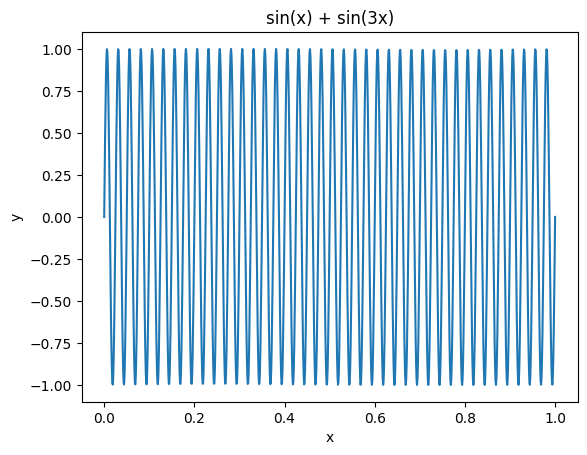

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Создаем массив точек sin(x)+sin(3x)
x = np.linspace(0, 1, 1000)
y = np.sin(2*np.pi*40*x)

# Водим массив точек на график
plt.plot(x, y)
plt.title('sin(x) + sin(3x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

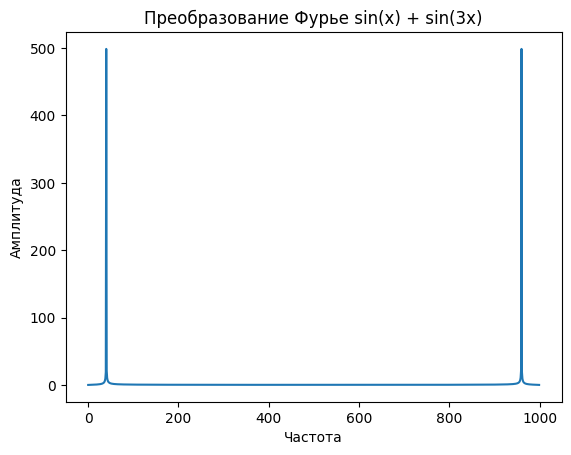

(array([ 40, 960]),)

In [ ]:
# Делаем преобразование Фурье
fft_y = np.fft.fft(y)

fft_y = abs(fft_y)

# Водим преобразование Фурье на график
plt.plot(fft_y)
plt.title('Преобразование Фурье sin(x) + sin(3x)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

result = -np.sort(-fft_y)[:3]

np.where(fft_y > result[-1])

In [ ]:
a = np.array([1,-6,8])

b = np.array([1,-4,0])

fa = np.fft.fft(a)
fb= np.fft.fft(b)

fc= fa/fb
ic = np.fft.ifft(fc).real

print(abs(fc),ic)

[1.         2.64575131 2.64575131] [ 1.00000000e+00 -2.00000000e+00 -1.48029737e-16]


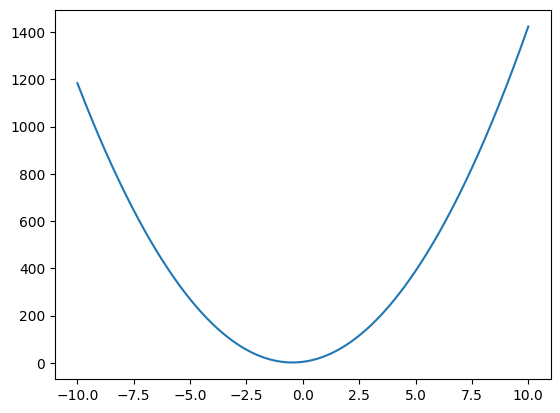

In [ ]:
x = np.linspace(-10, 10, 1000)
y = np.zeros(x.size)
for i in range(3):
  y+=x**i*ic[i]

# Водим массив точек на график
plt.plot(x, y)

In [ ]:
n = 4
w = np.exp(2*np.pi*1j/n)

arr = np.zeros((n, n), dtype=np.complex)

for i in range(n):
    for j in range(n):
        arr[i][j] = w**(i*j)

w

<ipython-input-445-3f2d56a23f5d>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.zeros((n, n), dtype=np.complex)


(6.123233995736766e-17+1j)

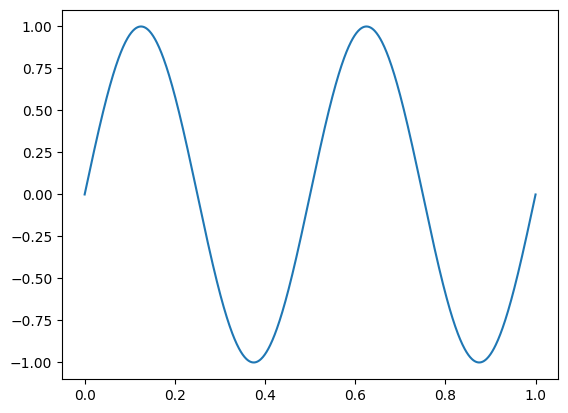

In [ ]:
x = np.linspace(0,1,1000)
arr = np.sin(2*np.pi*2*x)

plt.plot(x,arr)
plt.show()

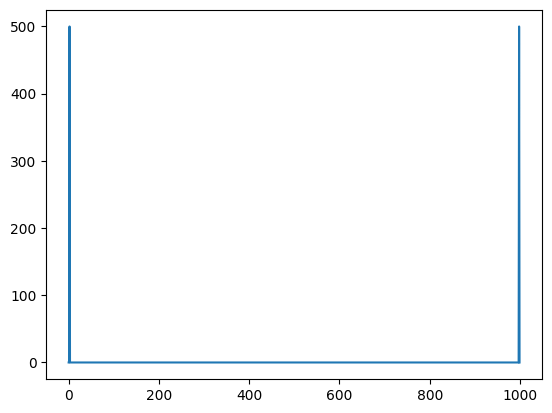

In [ ]:
farr = np.fft.fft(arr)
farr[abs(farr)<40]=0

plt.plot(abs(farr))
plt.show()

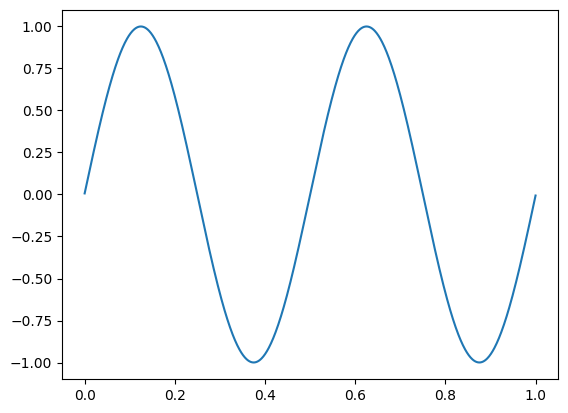

In [ ]:

iarr = np.fft.ifft(farr)

plt.plot(x,iarr)
plt.show()

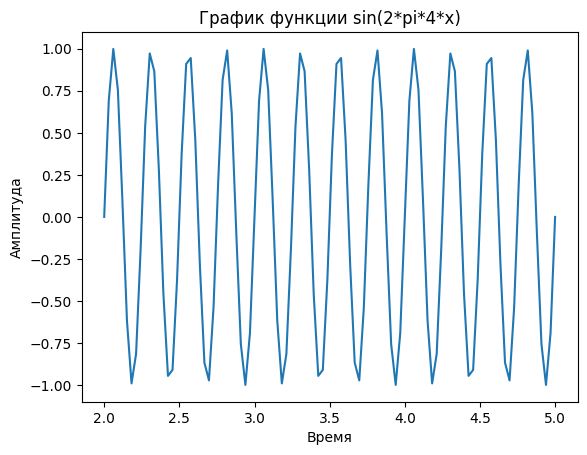

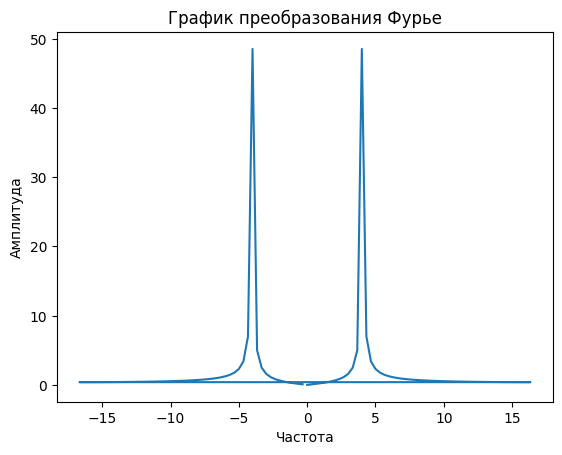

Доминирующая частота: 4.0


In [ ]:
x = np.linspace(2, 5, 100)
y = np.sin(2 * np.pi * 4 * x)

# Отображаем график функции
plt.plot(x, y)
plt.title('График функции sin(2*pi*4*x)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

# Выполняем преобразование Фурье
fourier_transform = np.fft.fft(y)

# Отображаем график преобразования Фурье
sampling_rate = 1000  # Частота дискретизации
freqs = np.fft.fftfreq(len(y),3/100)
plt.plot(freqs,np.abs(fourier_transform))
plt.title('График преобразования Фурье')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()


dominant_frequency = freqs[np.argmax(np.abs(fourier_transform))]
print('Доминирующая частота:', dominant_frequency)

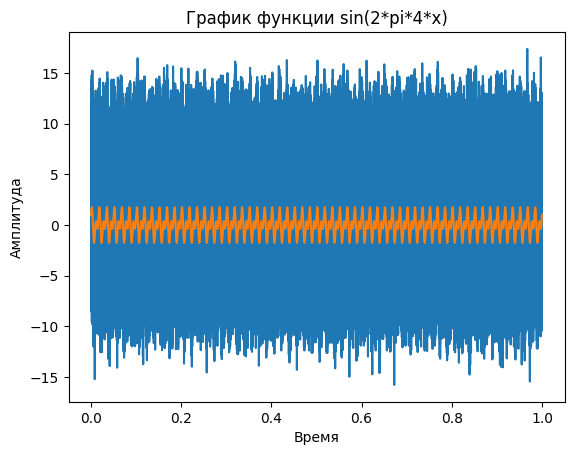

In [ ]:
size =10_000_000

a = np.linspace(0,1,size)
yo = np.sin(2*np.pi*120*a)+np.cos(2*np.pi*60*a)
y= yo + np.random.normal(1,3,size)

plt.plot(a, y)
plt.plot(a, yo)
plt.title('График функции sin(2*pi*4*x)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

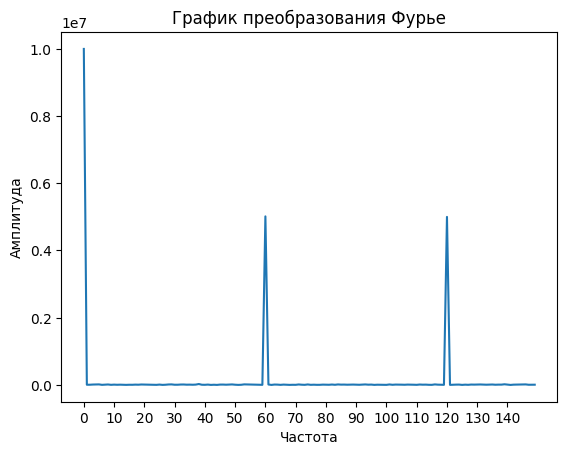

In [ ]:
# Выполняем преобразование Фурье
fourier_transform = np.fft.fft(y)

# Отображаем график преобразования Фурье
plt.plot(np.abs(fourier_transform)[:150])
plt.title('График преобразования Фурье')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.xticks(np.arange(0,150,10))
plt.show()

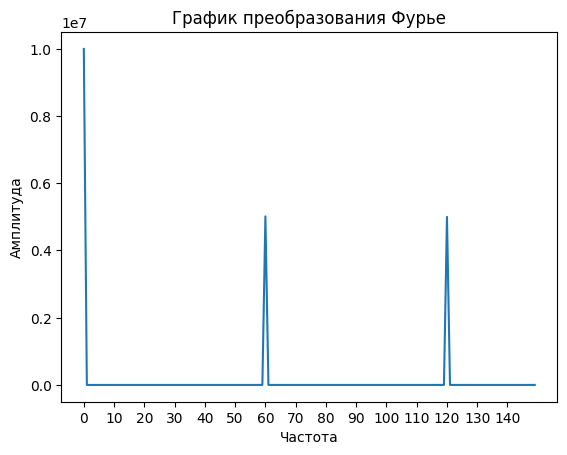

In [ ]:
barr = np.abs(fourier_transform)<0.1*10**6
fourier_transform[barr] = 0
# Отображаем график преобразования Фурье
plt.plot(np.abs(fourier_transform)[:150])
plt.title('График преобразования Фурье')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.xticks(np.arange(0,150,10))
plt.show()

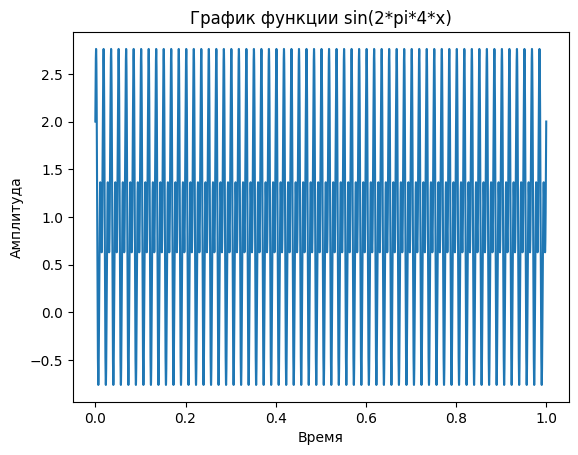

In [ ]:
yi = np.fft.ifft(fourier_transform)

plt.plot(a, yi)
plt.title('График функции sin(2*pi*4*x)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

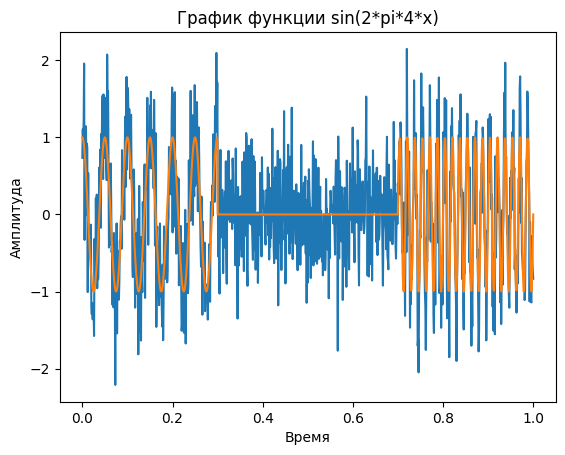

In [ ]:
x = np.linspace(0,1,1000)
y = np.zeros(1000)

y[:300] = np.cos(2*np.pi*20*x[:300])
y[700:] = np.sin(2*np.pi*60*x[700:])
yo =y.copy()
rand = np.random.normal(0,0.5,1000)
y+=rand

plt.plot(x, y)
plt.plot(x, yo)
plt.title('График функции sin(2*pi*4*x)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

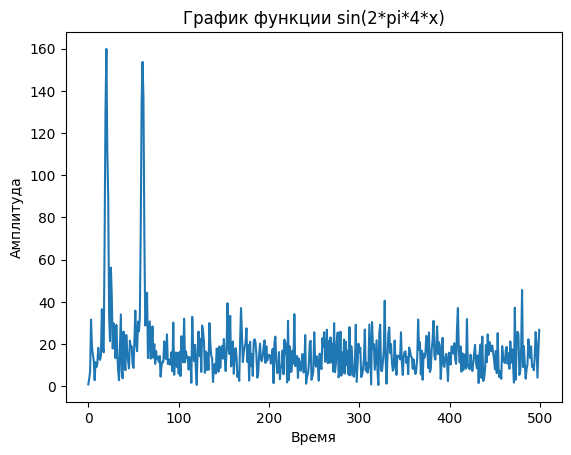

In [ ]:
yf = np.fft.fft(y)

plt.plot(np.abs(yf[:500]))
plt.title('График функции sin(2*pi*4*x)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

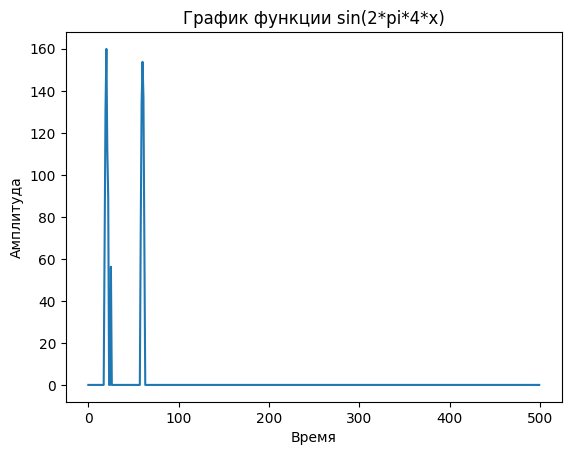

In [ ]:
# rand = y[300:700]
# rand = np.tile(rand,1000//rand.size+1)
# rand = rand[:1000]

# rand = np.random.normal(0,0.5,1000)
# frand = np.fft.fft(rand)
# yf-=frand


threshold = 0.3 * np.max(np.abs(yf))
yf[np.abs(yf) < threshold] = 0

plt.plot(np.abs(yf[:500]))
plt.title('График функции sin(2*pi*4*x)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

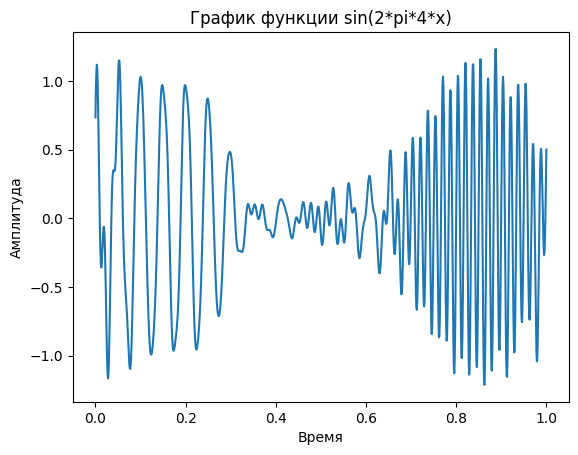

In [ ]:
yi = np.fft.ifft(yf)

plt.plot(x, yi)
plt.title('График функции sin(2*pi*4*x)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

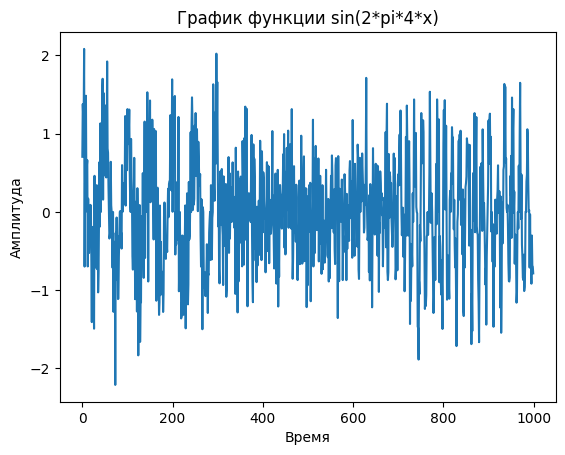

In [ ]:
ys = np.array_split(y,10)
ys = np.vstack(ys)

yf = np.apply_along_axis(np.fft.fft, 0, ys)
for ffy in yf:
  threshold = 0.4 * np.max(np.abs(ffy))
  ffy[np.abs(ffy) < threshold] = 0
yi = np.apply_along_axis(np.fft.ifft, 0, yf)
yi = yi.flatten()



plt.plot(yi)
plt.title('График функции sin(2*pi*4*x)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

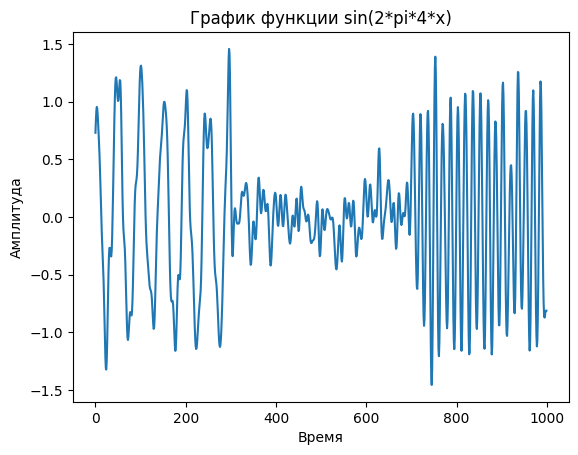

In [ ]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Функция для применения фильтра Баттеруорта
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Параметры фильтра
cutoff = 100  # Частота среза в герцах
fs = 1000     # Частота дискретизации сигнала
order = 5    # Порядок фильтра

# Применение фильтра
filtered_y = butter_lowpass_filter(y, cutoff, fs, order)

plt.plot(filtered_y)
plt.title('График функции sin(2*pi*4*x)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

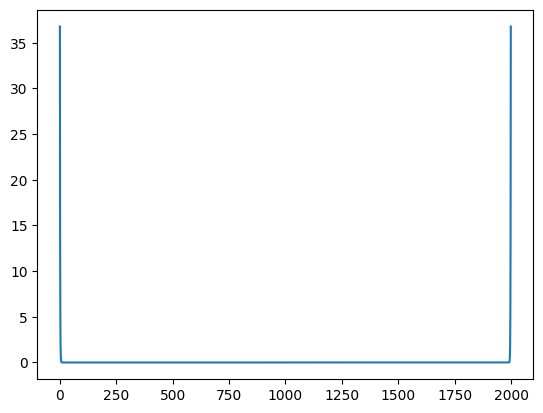

In [ ]:
vf = np.vectorize(lambda x: np.exp(-x))
ft =np.arange(1,1001)
ft = vf(ft)*100
ft= np.hstack((ft,ft[::-1]))
plt.plot(np.abs(ft))
plt.show()

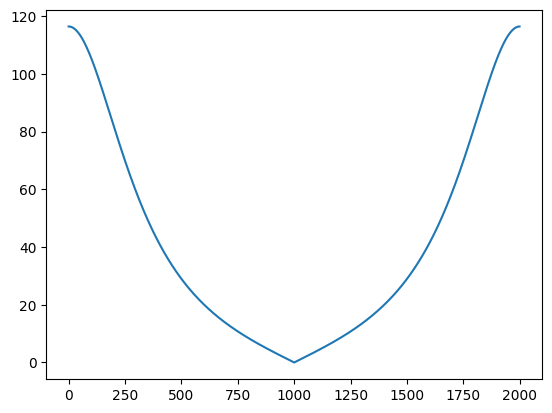

In [ ]:
ift = np.fft.fft(ft)

plt.plot(abs(ift))
plt.show()